In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [11]:
# Load and split data
data = load_boston()
X,y = data['data'],data['target']
X = (X - X.mean()) / (X.std())
X = np.insert(X,0,np.ones(X.shape[0:1]),axis=1)

In [3]:
# Custom train test split
def train_test_divide(X,y,test_size=0.3,random_state=42):
    np.random.seed(random_state)
    train_size = 1 - test_size
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand,(100*train_size))
    
    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]
    
    return X_train, X_test, y_train, y_test

def mse(preds,y):
        m = len(y)
        return 1/(m) * np.sum(np.square((y - preds)))

In [4]:
X_train,X_test,y_train,y_test = train_test_divide(X,y,test_size=0.3,random_state=42)

In [5]:
class LinReg:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.bgd = False
    
    def add_intercept_term(self,X):
        X = np.insert(X,0,np.ones(X.shape[0:1]),axis=1).copy()
        return X
        
    def feature_scale(self,X):
        X = (X - X.mean()) / (X.std())
        return X
    
    def initialise_thetas(self):
        np.random.seed(42)
        self.thetas = np.random.rand(self.X.shape[1])

        
    def normal_equation(self):
        A = np.linalg.inv(np.dot(self.X.T,self.X))
        B = np.dot(self.X.T,self.y)
        thetas = np.dot(A,B)
        return thetas
    
    
    def batch_gradient_descent(self,alpha,n_iterations):
        self.cost_history = [0] * (n_iterations)
        self.n_iterations = n_iterations
        
        for i in range(n_iterations):
            h = np.dot(self.X,self.thetas.T)
            gradient = alpha * (1/self.m) * ((h - self.y)).dot(self.X)
            
            self.thetas = self.thetas - gradient
            self.cost_history[i] = mse(np.dot(self.X,self.thetas.T),self.y)
            
        return self.thetas
    
    def fit(self,bgd=False,alpha=0.158,n_iterations=4000):
        self.X = self.add_intercept_term(self.X)
        self.X = self.feature_scale(self.X)
        if bgd == False:
            
            self.thetas = self.normal_equation()
        else:
            self.bgd = True
            self.initialise_thetas()
            self.thetas = self.batch_gradient_descent(alpha,n_iterations)
            
    def plot_cost_function(self):
        
        if self.bgd == True:
            plt.plot(range((self.n_iterations)),self.cost_history)
            plt.xlabel('No. of iterations')
            plt.ylabel('Cost Function')
            plt.title('Gradient Descent Cost Function Line Plot')
            plt.show()
        else:
            print('Batch Gradient Descent was not used!')
    
    def predict(self,X_test):
        self.X_test = X_test.copy()
        self.X_test = self.add_intercept_term(self.X_test)
        self.X_test = self.feature_scale(self.X_test)
        predictions = np.dot(self.X_test,self.thetas.T)
        return predictions


In [6]:
lin_reg_bgd = LinReg(X_train,y_train)
lin_reg_bgd.fit(bgd=True)

In [7]:
mse(y_test,lin_reg_bgd.predict(X_test))

28.83154047513958

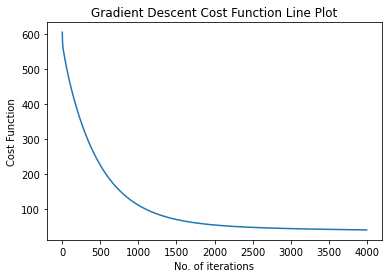

In [8]:
lin_reg_bgd.plot_cost_function()

In [9]:
lin_reg_normal = LinReg(X_train,y_train)
lin_reg_normal.fit()

In [10]:
mse(y_test,lin_reg_normal.predict(X_test))

22.15141775886376